In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [31]:
df=pd.read_csv("clv_data.csv")

In [32]:
df.head()

,Order_ID,Customer_ID,Date,Age,Gender,City,Product_Category,Unit_Price,Quantity,Discount_Amount,Total_Amount,Payment_Method,Device_Type,Session_Duration_Minutes,Pages_Viewed,Is_Returning_Customer,Delivery_Time_Days,Customer_Rating
0,ORD_001337,CUST_01337,2023-01-01,27,Female,Bursa,Toys,54.28,1,0.00,54.28,Debit Card,Mobile,4,14,True,8,5
1,ORD_004885,CUST_04885,2023-01-01,42,Male,Konya,Toys,244.90,1,0.00,244.90,Credit Card,Mobile,11,3,True,3,3
2,ORD_004507,CUST_04507,2023-01-01,43,Female,Ankara,Food,48.15,5,0.00,240.75,Credit Card,Mobile,7,8,True,5,2
3,ORD_000645,CUST_00645,2023-01-01,32,Male,Istanbul,Electronics,804.06,1,229.28,574.78,Credit Card,Mobile,8,10,False,1,4
4,ORD_000690,CUST_00690,2023-01-01,40,Female,Istanbul,Sports,755.61,5,0.00,3778.05,Cash on Delivery,Desktop,21,10,True,7,4


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Order_ID                  5000 non-null   object 
 1   Customer_ID               5000 non-null   object 
 2   Date                      5000 non-null   object 
 3   Age                       5000 non-null   int64  
 4   Gender                    5000 non-null   object 
 5   City                      5000 non-null   object 
 6   Product_Category          5000 non-null   object 
 7   Unit_Price                5000 non-null   float64
 8   Quantity                  5000 non-null   int64  
 9   Discount_Amount           5000 non-null   float64
 10  Total_Amount              5000 non-null   float64
 11  Payment_Method            5000 non-null   object 
 12  Device_Type               5000 non-null   object 
 13  Session_Duration_Minutes  5000 non-null   int64  
 14  Pages_Vi

In [34]:
df['Date'] = pd.to_datetime(df['Date'])

In [35]:
df.isnull().sum()

Order_ID                    0
Customer_ID                 0
Date                        0
Age                         0
Gender                      0
City                        0
Product_Category            0
Unit_Price                  0
Quantity                    0
Discount_Amount             0
Total_Amount                0
Payment_Method              0
Device_Type                 0
Session_Duration_Minutes    0
Pages_Viewed                0
Is_Returning_Customer       0
Delivery_Time_Days          0
Customer_Rating             0
dtype: int64

In [36]:
df.duplicated().sum()

0

In [37]:
df.describe()

,Date,Age,Unit_Price,Quantity,Discount_Amount,Total_Amount,Session_Duration_Minutes,Pages_Viewed,Delivery_Time_Days,Customer_Rating
count,5000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.00000,5000.000000,5000.000000
mean,2023-08-16 09:16:24.959999744,35.032600,455.834120,2.220000,24.852804,983.108914,14.57340,8.98420,6.497000,3.902800
min,2023-01-01 00:00:00,18.000000,5.180000,1.000000,0.000000,7.870000,1.00000,1.00000,1.000000,1.000000
25%,2023-04-30 00:00:00,27.000000,76.587500,1.000000,0.000000,122.517500,8.00000,7.00000,4.000000,3.000000
50%,2023-08-17 00:00:00,35.000000,182.950000,2.000000,0.000000,337.910000,13.00000,9.00000,6.000000,4.000000
75%,2023-12-06 00:00:00,42.000000,513.930000,3.000000,8.760000,979.695000,19.00000,11.00000,8.000000,5.000000
max,2024-03-26 00:00:00,75.000000,7159.450000,5.000000,1525.550000,22023.900000,73.00000,24.00000,25.000000,5.000000
std,NaN,11.080546,712.477209,1.398711,88.385124,1898.978528,8.66575,2.80434,3.464966,1.128542


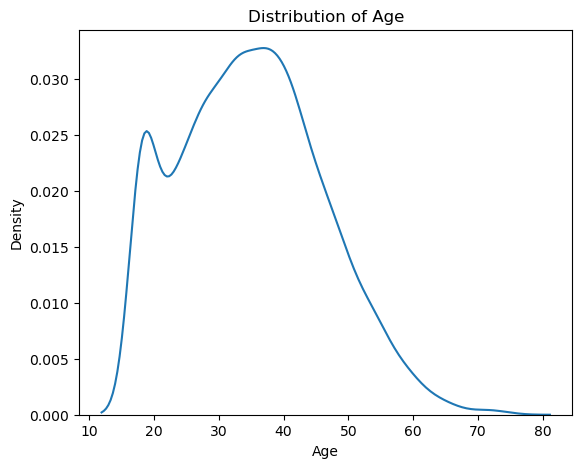

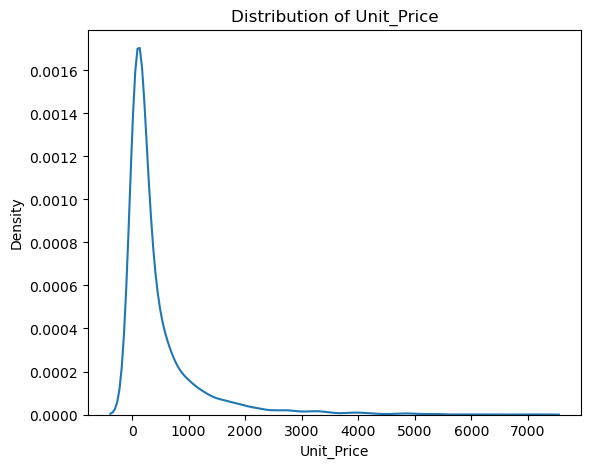

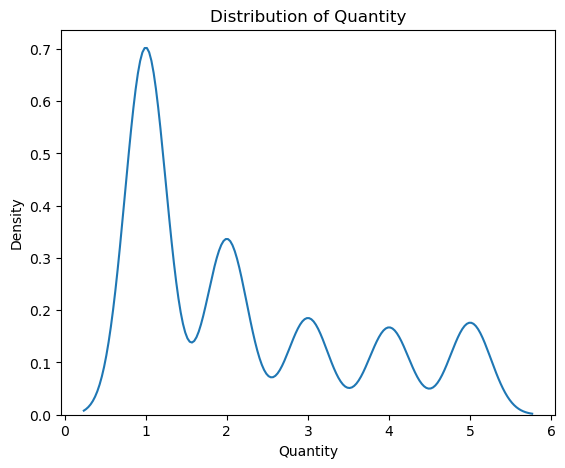

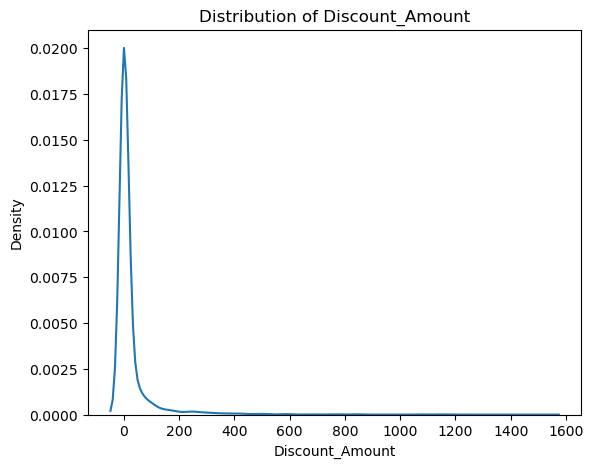

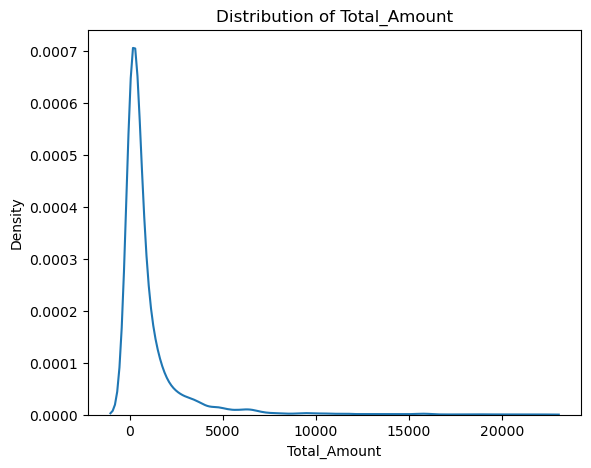

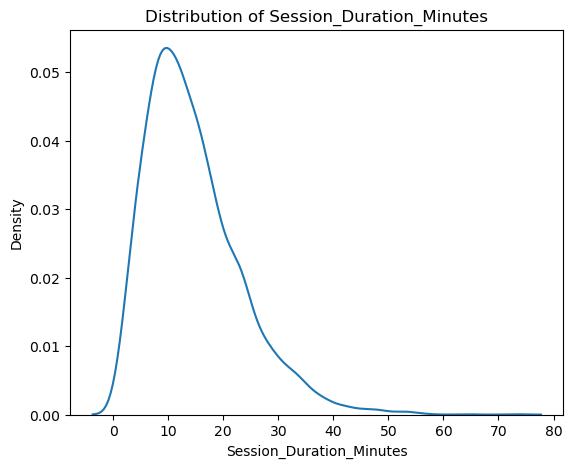

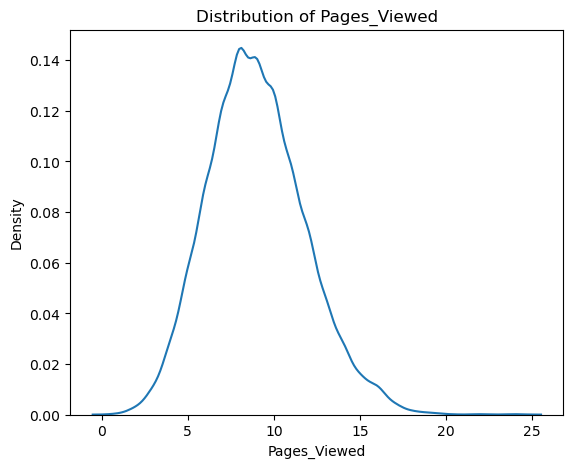

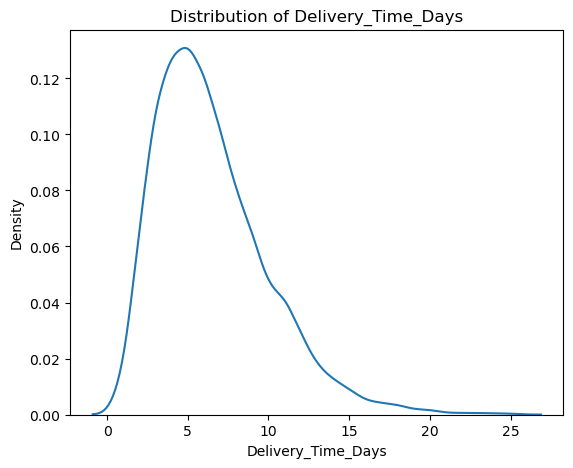

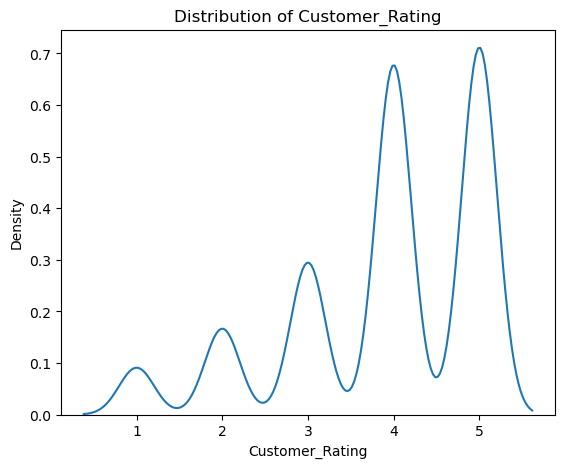

In [38]:
num_cols = ['Age', 'Unit_Price', 'Quantity', 'Discount_Amount', 'Total_Amount','Session_Duration_Minutes','Pages_Viewed','Delivery_Time_Days','Customer_Rating']

for col in num_cols:
    plt.figure(figsize=(14,5))

    # Histogram + KDE
    plt.subplot(1,2,1)
    sns.kdeplot(df[col])
    plt.title(f"Distribution of {col}")

<Axes: >

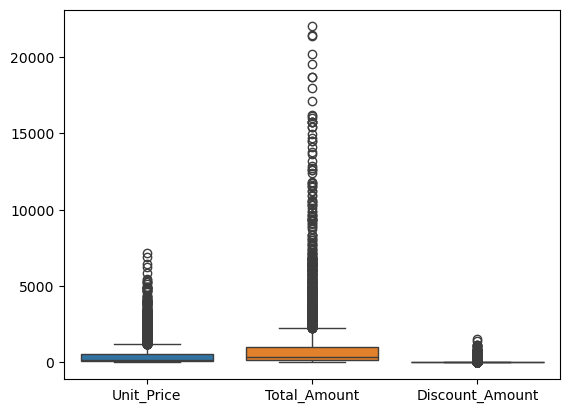

In [39]:

sns.boxplot(data=df[["Unit_Price", "Total_Amount", "Discount_Amount"]])

In [40]:
df['Total_Amount'] = df['Total_Amount'].round(0).astype(int)

In [41]:


num_cols = ["Unit_Price", "Total_Amount", "Discount_Amount"]

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Cap and floor the outliers
    df[col] = df[col].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))

print(df[num_cols].describe())

        Unit_Price  Total_Amount  Discount_Amount
count  5000.000000   5000.000000      5000.000000
mean    353.589695    672.898600         5.219484
std     372.751011    733.108543         8.713484
min       5.180000      8.000000         0.000000
25%      76.587500    123.000000         0.000000
50%     182.950000    338.000000         0.000000
75%     513.930000    980.000000         8.760000
max    1169.943750   2265.500000        21.900000


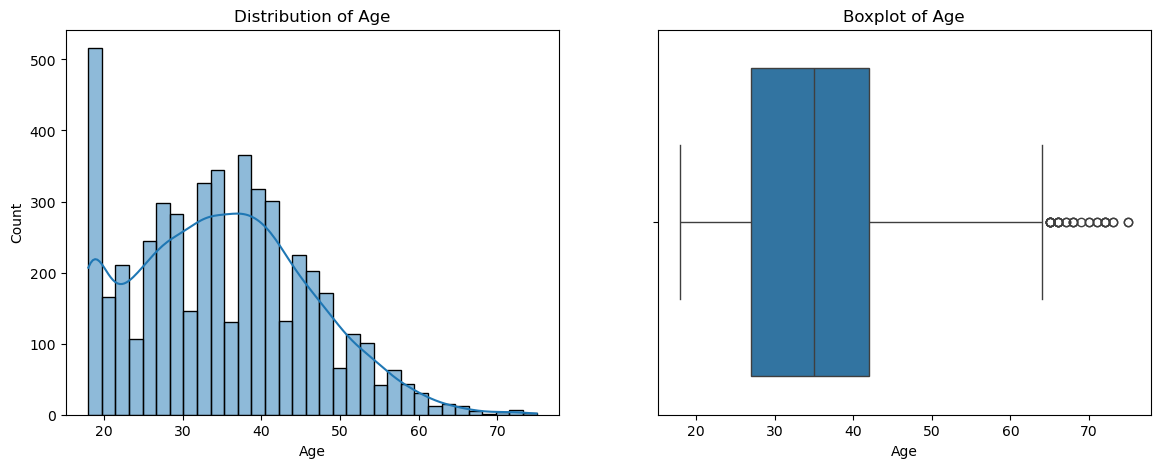

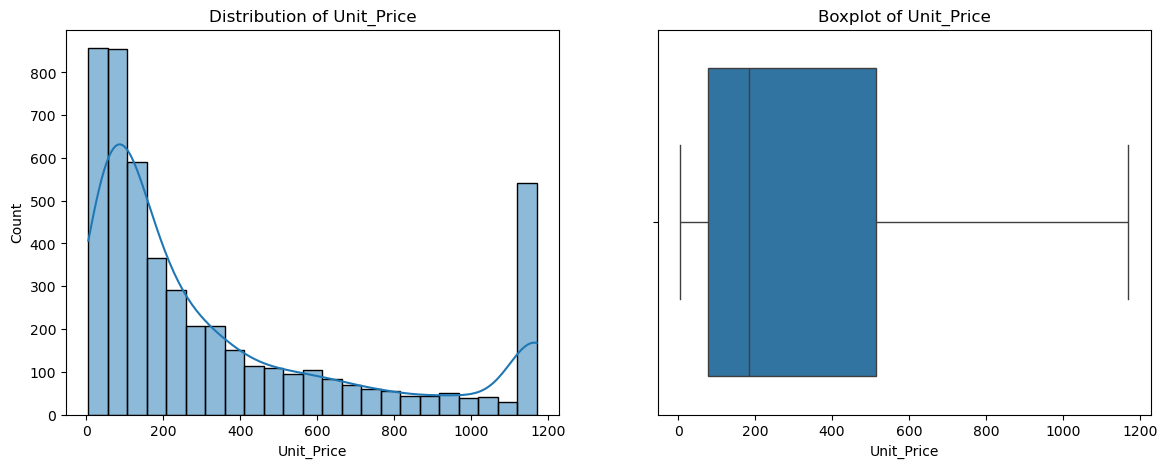

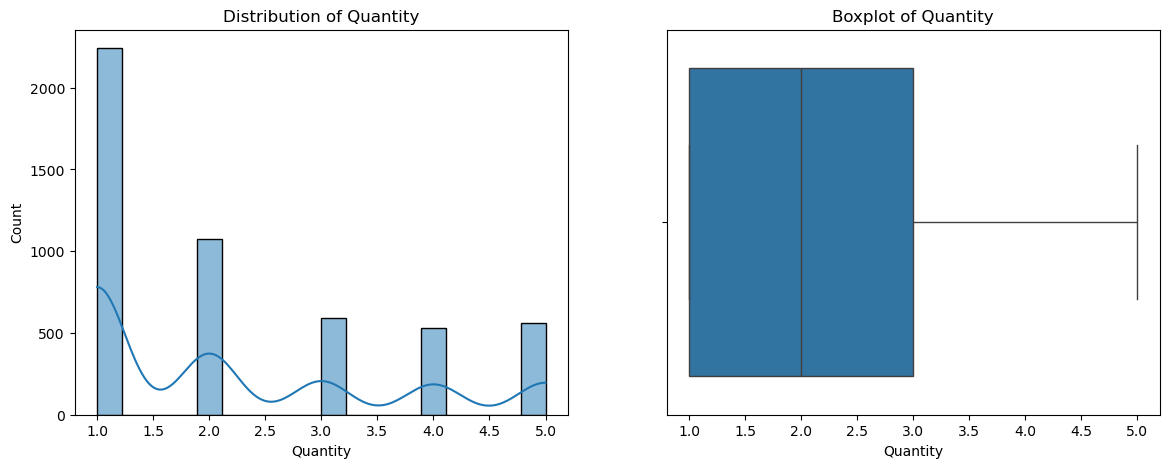

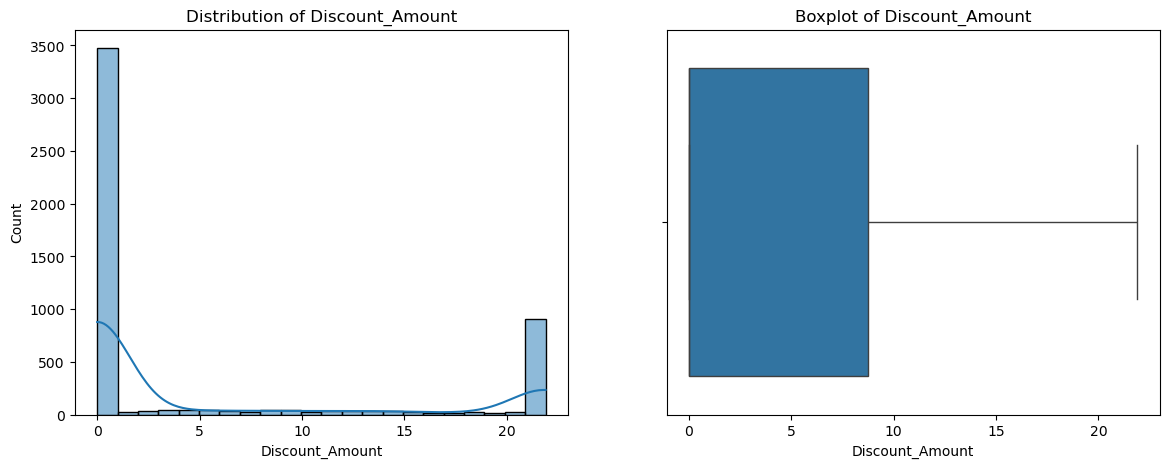

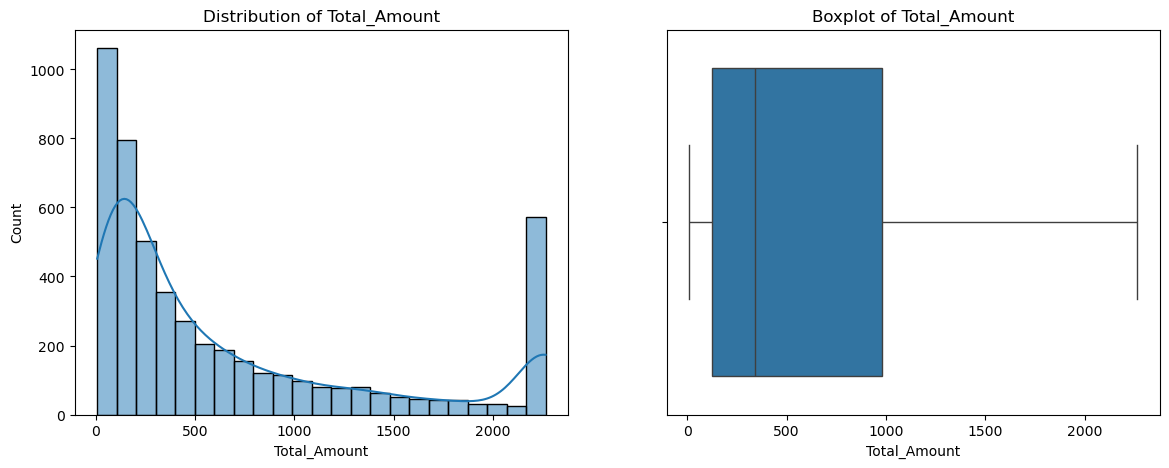

In [42]:
num_cols = ['Age', 'Unit_Price', 'Quantity', 'Discount_Amount', 'Total_Amount']

for col in num_cols:
    plt.figure(figsize=(14,5))

    # Histogram + KDE
    plt.subplot(1,2,1)
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")

    # Boxplot
    plt.subplot(1,2,2)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")

    plt.show()


In [43]:
df.columns

Index(['Order_ID', 'Customer_ID', 'Date', 'Age', 'Gender', 'City',
       'Product_Category', 'Unit_Price', 'Quantity', 'Discount_Amount',
       'Total_Amount', 'Payment_Method', 'Device_Type',
       'Session_Duration_Minutes', 'Pages_Viewed', 'Is_Returning_Customer',
       'Delivery_Time_Days', 'Customer_Rating'],
      dtype='object')

In [44]:
cat_cols = [
    'Gender',
    'City',
    'Product_Category',
    'Payment_Method',
    'Device_Type',
    'Is_Returning_Customer'
]

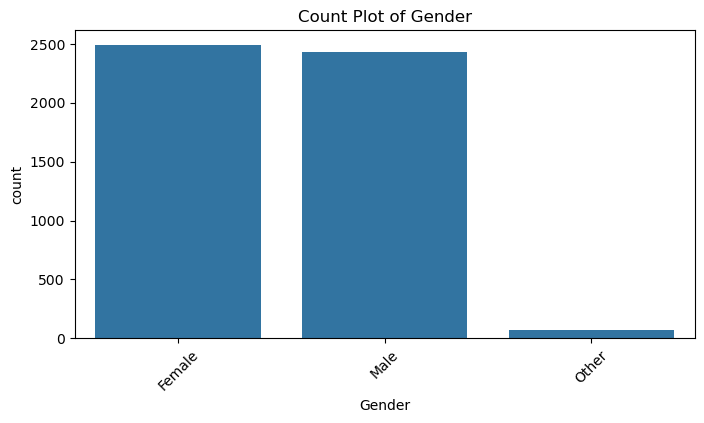

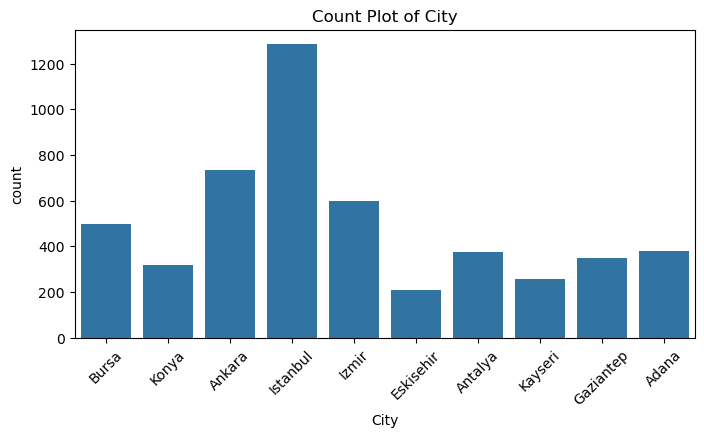

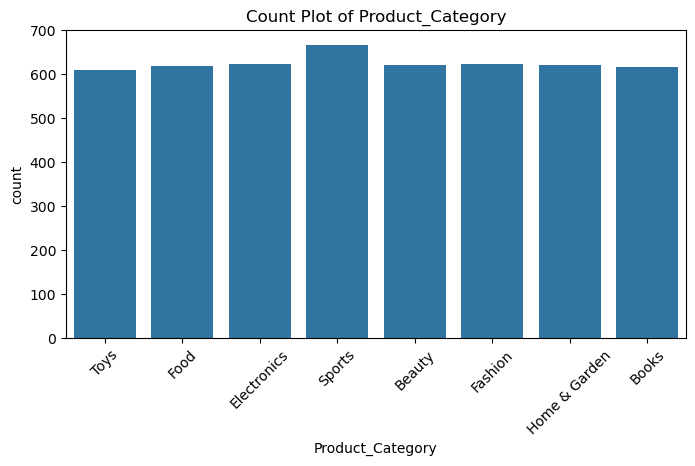

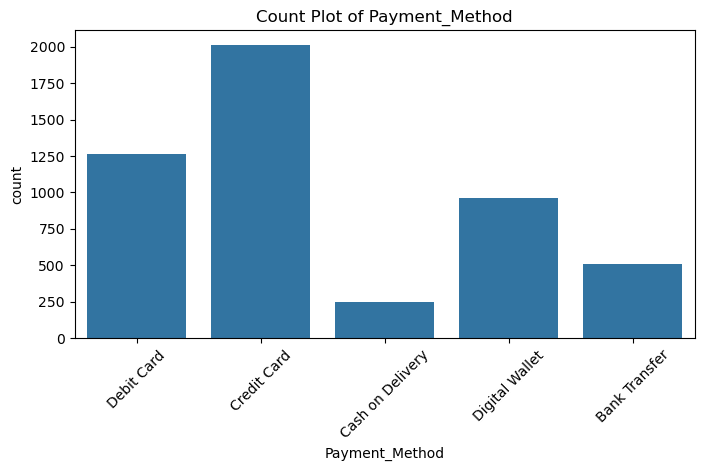

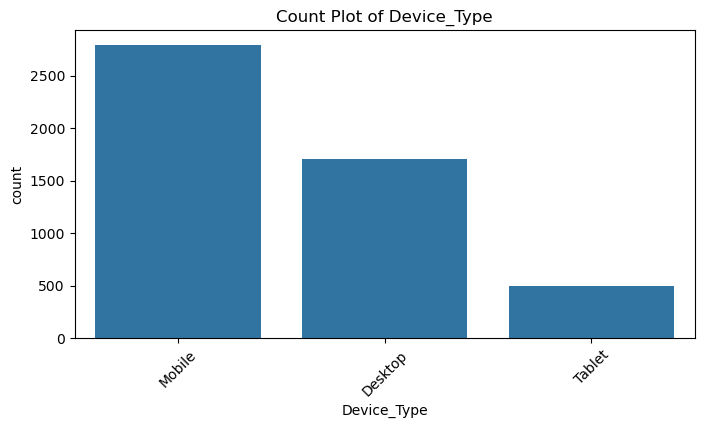

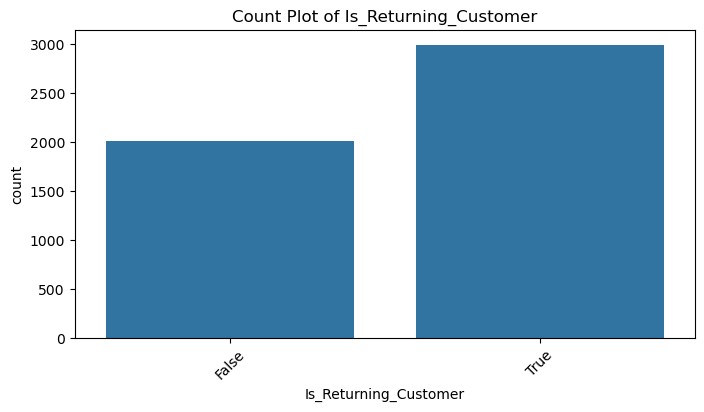

In [45]:
for col in cat_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(x=df[col])
    plt.title(f"Count Plot of {col}")
    plt.xticks(rotation=45)
    plt.show()


In [46]:
# C# Step 1: Aggregate Total_Amount per customer
# Step 1: Calculate total spent per customer
total_spent = df.groupby('Customer_ID')['Total_Amount'].sum()

# Step 2: Create new feature Total_Spent in df using map()
df['Total_Spent'] = df['Customer_ID'].map(total_spent)

# Step 3: Set target variable
target = 'Total_Spent'


In [47]:
df['Total_Spent']

0         54.0
1        245.0
2        241.0
3        575.0
4       2265.5
         ...  
4995     103.0
4996      72.0
4997      34.0
4998     171.0
4999     315.0
Name: Total_Spent, Length: 5000, dtype: float64

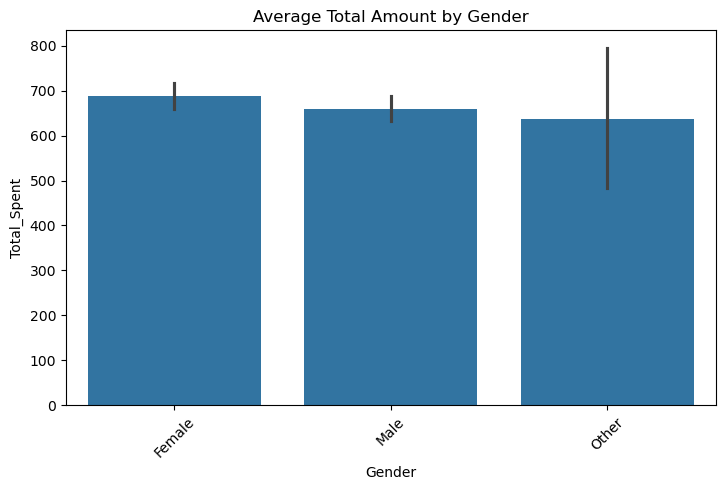

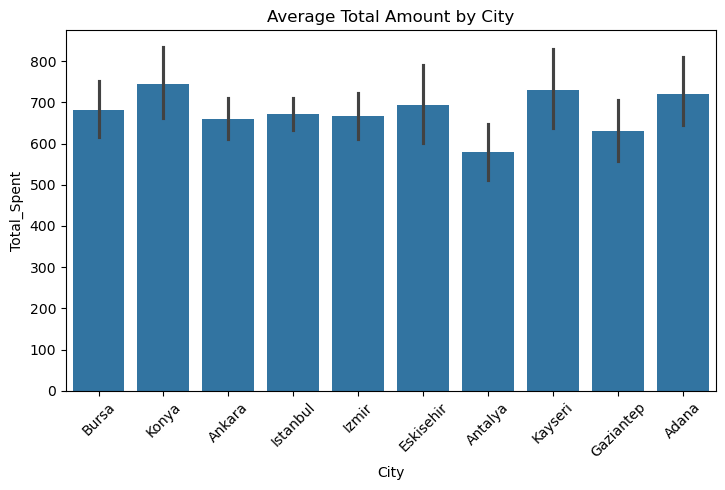

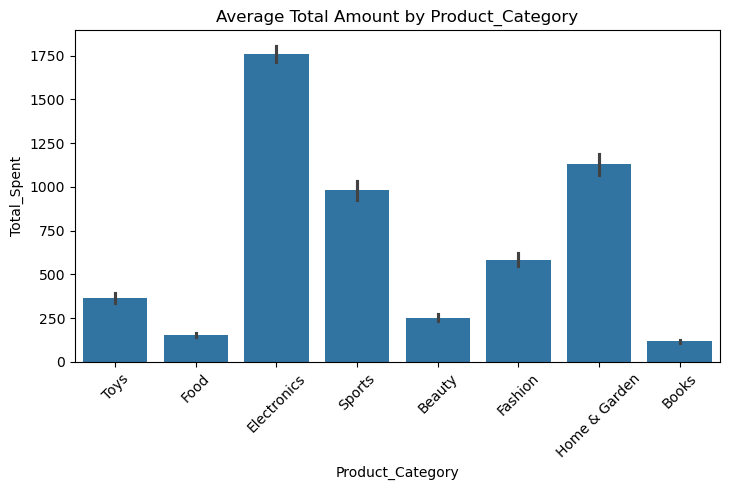

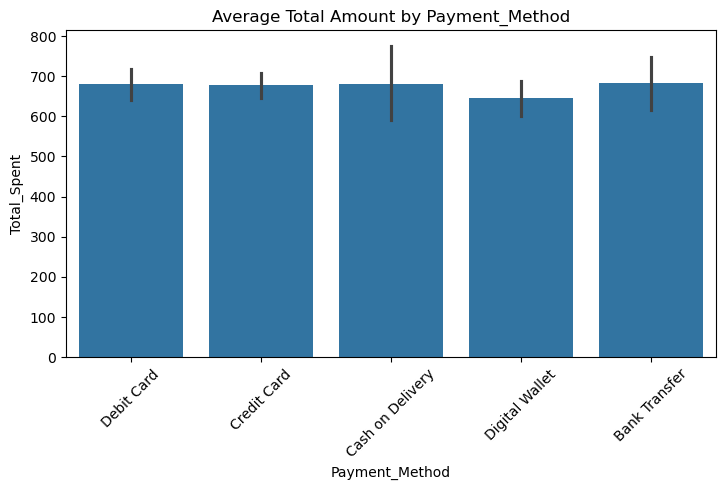

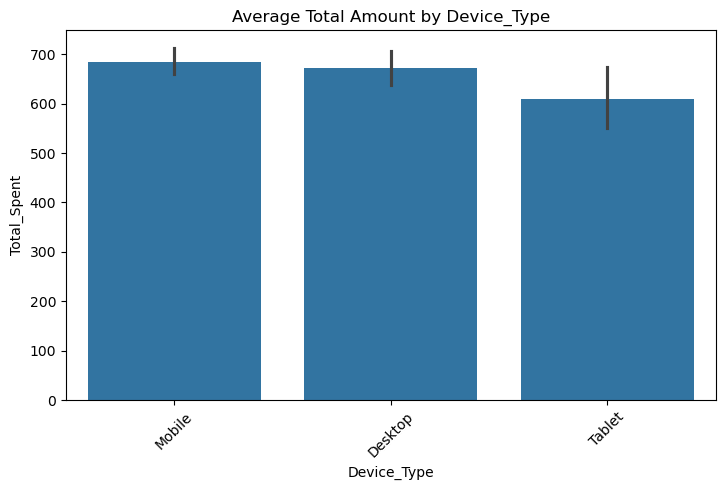

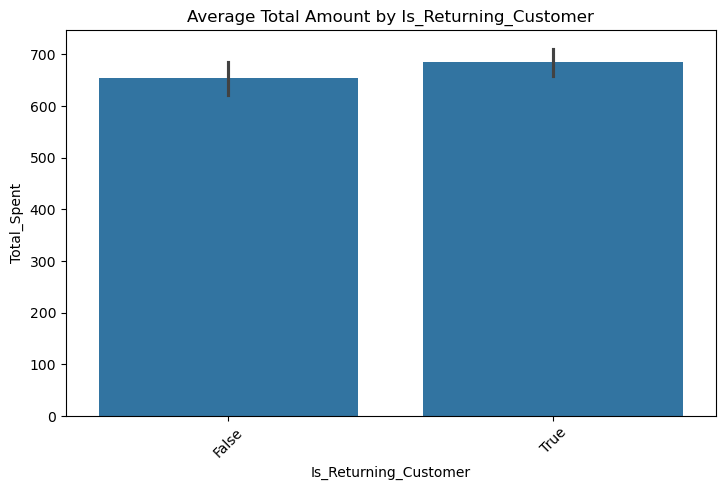

In [48]:
cat_cols = [
    'Gender',
    'City',
    'Product_Category',
    'Payment_Method',
    'Device_Type',
    'Is_Returning_Customer'
]

for col in cat_cols:
    plt.figure(figsize=(14,5))

    # Barplot (Average spend)
    plt.subplot(1,2,1)
    sns.barplot(x=df[col], y=df[target])
    plt.title(f"Average Total Amount by {col}")
    plt.xticks(rotation=45)


    plt.tight_layout()
    plt.show()


In [49]:
num_cols = ['Age', 'Unit_Price', 'Quantity', 'Discount_Amount','Total_Amount',
            'Session_Duration_Minutes', 'Pages_Viewed', 'Delivery_Time_Days',
            'Customer_Rating', 'Year', 'Month', 'Day', 'Weekend']
cat_cols = ['Gender', 'City',
            'Product_Category', 'Payment_Method', 'Device_Type',
            'Is_Returning_Customer']
target='Total_Spent'

In [50]:

df['Date'] = pd.to_datetime(df['Date'])

# Extract features
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Weekend'] = df['Date'].dt.weekday  # 0 = Monday, 6 = Sunday


In [51]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler,LabelEncoder,MinMaxScaler

In [53]:
scaler=StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])


le=LabelEncoder()


for col in cat_cols:
    df[col] = le.fit_transform(df[col])


In [ ]:
# # One-hot encode categorical columns and drop first to avoid dummy variable trap
# df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# # Optional: convert boolean columns to 0/1 integers
# dummy_cols = [col for col in df.columns if any(c in col for c in cat_cols)]
# df[dummy_cols] = df[dummy_cols].astype(int)

# print("Categorical columns successfully one-hot encoded. New shape:", df.shape)

Categorical columns successfully one-hot encoded. New shape: (5000, 42)


feature selection using correaltion using numerical vs numerical 

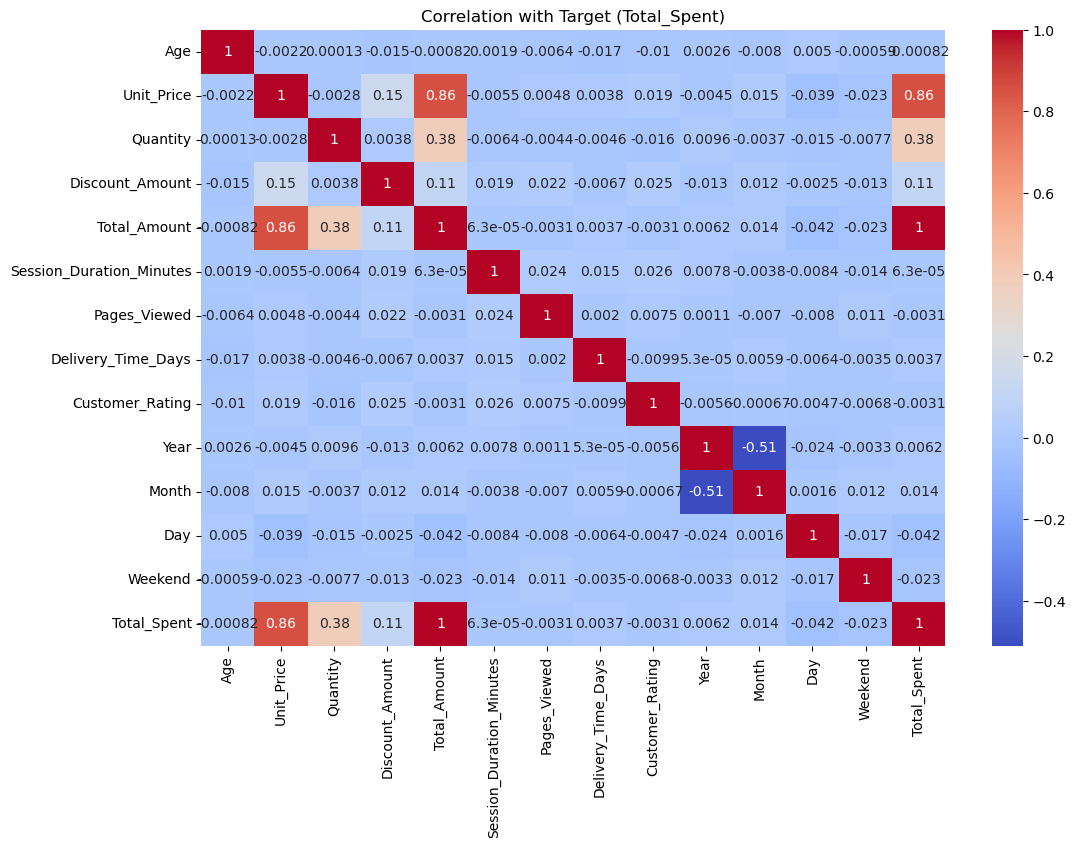

In [54]:

num_cols = ['Age', 'Unit_Price', 'Quantity', 'Discount_Amount','Total_Amount',
            'Session_Duration_Minutes', 'Pages_Viewed', 'Delivery_Time_Days',
            'Customer_Rating', 'Year', 'Month', 'Day', 'Weekend']

target = ['Total_Spent']   # MUST be a list, correct column name

corr = df[num_cols + target].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation with Target (Total_Spent)")
plt.show()


In [71]:
# Your feature columns
features = ['Age', 'Unit_Price', 'Quantity', 'Discount_Amount','Total_Amount',
            'Session_Duration_Minutes', 'Pages_Viewed', 'Delivery_Time_Days',
            'Customer_Rating', 'Year', 'Month', 'Day', 'Weekend',
            'Gender', 'City', 'Product_Category', 'Payment_Method',
            'Device_Type', 'Is_Returning_Customer']

X = df[features]
y =df['Total_Spent']    # your CLV/Total_Spent feature


In [87]:
features


['Age',
 'Unit_Price',
 'Quantity',
 'Discount_Amount',
 'Total_Amount',
 'Session_Duration_Minutes',
 'Pages_Viewed',
 'Delivery_Time_Days',
 'Customer_Rating',
 'Year',
 'Month',
 'Day',
 'Weekend',
 'Gender',
 'City',
 'Product_Category',
 'Payment_Method',
 'Device_Type',
 'Is_Returning_Customer']

In [72]:
print(X.shape)
print(y.shape)


(5000, 19)
(5000,)


In [74]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("x_train:", X_train.shape)
print("x_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)



x_train: (4000, 19)
x_test: (1000, 19)
y_train: (4000,)
y_test: (1000,)


In [78]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

# 1. Ensure X is numeric and has no missing values
X = X.select_dtypes(include=['int64', 'float64'])
X = X.fillna(0)

y = y.fillna(0)

# 2. Define model
model = LinearRegression()

# 3. RFE model
rfe = RFE(estimator=model, n_features_to_select=19)

# 4. Fit RFE
rfe.fit(X, y)

# 5. Print selected features
selected_features = X.columns[rfe.support_]
print("Selected Features:")
print(selected_features)


Selected Features:
Index(['Age', 'Unit_Price', 'Quantity', 'Discount_Amount', 'Total_Amount',
       'Session_Duration_Minutes', 'Pages_Viewed', 'Delivery_Time_Days',
       'Customer_Rating', 'Year', 'Month', 'Day', 'Weekend',
       'Is_Returning_Customer'],
      dtype='object')


c:\Users\USER\anaconda3\Lib\site-packages\sklearn\feature_selection\_rfe.py:291: UserWarning: Found n_features_to_select=19 > n_features=14. There will be no feature selection and all features will be kept.
  warnings.warn(


In [83]:
pip install xgboost

   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---- ----------------------------------- 8.1/72.0 MB 46.0 MB/s eta 0:00:02
   --------- ------------------------------ 17.0/72.0 MB 43.0 MB/s eta 0:00:02
   ------------- -------------------------- 23.9/72.0 MB 38.7 MB/s eta 0:00:02
   --------------- ------------------------ 27.3/72.0 MB 33.3 MB/s eta 0:00:02
   ------------------ --------------------- 33.0/72.0 MB 31.8 MB/s eta 0:00:02
   --------------------- ------------------ 39.6/72.0 MB 31.5 MB/s eta 0:00:02
   ------------------------ --------------- 43.5/72.0 MB 29.5 MB/s eta 0:00:01
   --------------------------- ------------ 49.0/72.0 MB 28.9 MB/s eta 0:00:01
   ------------------------------ --------- 54.5/72.0 MB 28.5 MB/s eta 0:00:01
   --------------------------------- ------ 59.5/72.0 MB 27.9 MB/s eta 0:00:01
   ----------------------------------- ---- 64.7/72.0 MB 27.5 MB/s eta 0:00:01
   ---------------------------------------  71.8/72.0 MB 28.1 

In [86]:


from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd

# -------------------------------
# 1️⃣ Define all models
# -------------------------------
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1),
    'ElasticNet': ElasticNet(alpha=0.1, l1_ratio=0.5),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    'SVR (RBF Kernel)': SVR(kernel='rbf', C=1.0, epsilon=0.1)
}

# Optional: XGBoost if installed
try:
    from xgboost import XGBRegressor
    models['XGBoost'] = XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42)
except:
    print("⚠️ XGBoost is not installed. Skipping XGBoost model.")

# -------------------------------
# 2️⃣ Train and evaluate each model
# -------------------------------
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse=mean_squared_error(y_test,y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    results.append({
        'Model': name,
        'MAE': mae,
        'MSE':mse,
        'RMSE': rmse,
        'R2_Score': r2
    })

# -------------------------------
# 3️⃣ Results in sorted order
# -------------------------------
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='RMSE', ascending=True)
print(results_df)


               Model           MAE           MSE          RMSE  R2_Score
0  Linear Regression  5.520064e-13  5.075561e-25  7.124297e-13  1.000000
2   Lasso Regression  9.364504e-02  1.481663e-02  1.217236e-01  1.000000
1   Ridge Regression  3.571612e-01  2.501788e-01  5.001788e-01  0.999999
5      Random Forest  3.586250e-01  5.956175e-01  7.717626e-01  0.999999
4      Decision Tree  6.620000e-01  2.540000e+00  1.593738e+00  0.999995
6  Gradient Boosting  2.708745e+00  1.609947e+01  4.012415e+00  0.999967
8            XGBoost  2.368904e+00  2.093523e+01  4.575503e+00  0.999957
3         ElasticNet  4.054182e+01  3.311757e+03  5.754786e+01  0.993162
7   SVR (RBF Kernel)  4.247094e+02  4.477477e+05  6.691395e+02  0.075565


In [92]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

model = LinearRegression()
rfe = RFE(estimator=model)
rfe.fit(X_train, y_train)

selected_rfe_features = X_train.columns[rfe.support_]
print("\n✅ Top 10 Features Selected by RFE:\n", selected_rfe_features)



✅ Top 10 Features Selected by RFE:
 Index(['Unit_Price', 'Quantity', 'Discount_Amount', 'Total_Amount',
       'Session_Duration_Minutes', 'Year', 'Month', 'Gender',
       'Payment_Method'],
      dtype='object')


In [93]:
# Select only RFE chosen columns
X_train_rfe = X_train[selected_rfe_features]
X_test_rfe  = X_test[selected_rfe_features]


In [94]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd

results = []

# -------------------------------
#  Model definitions
# -------------------------------
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1),
    'ElasticNet': ElasticNet(alpha=0.1, l1_ratio=0.5),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    'SVR (RBF Kernel)': SVR(kernel='rbf', C=1.0, epsilon=0.1)
}

# -------------------------------
#  Train & evaluate using RFE features
# -------------------------------
for name, model in models.items():
    
    model.fit(X_train_rfe, y_train)
    y_pred = model.predict(X_test_rfe)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    results.append({
        'Model': name,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R2_Score': r2
    })

# -------------------------------
#  Results in sorted order
# -------------------------------
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='RMSE', ascending=True)

print("\n📌 Model Performance Using RFE Selected Features\n")
print(results_df)



📌 Model Performance Using RFE Selected Features

               Model           MAE           MSE          RMSE  R2_Score
0  Linear Regression  4.426965e-13  3.326623e-25  5.767689e-13  1.000000
2   Lasso Regression  9.320387e-02  1.451613e-02  1.204829e-01  1.000000
1   Ridge Regression  3.543402e-01  2.480551e-01  4.980513e-01  0.999999
5      Random Forest  3.076900e-01  4.586723e-01  6.772535e-01  0.999999
4      Decision Tree  4.730000e-01  1.757000e+00  1.325519e+00  0.999996
6  Gradient Boosting  2.671295e+00  1.579411e+01  3.974181e+00  0.999967
3         ElasticNet  4.032838e+01  3.294617e+03  5.739876e+01  0.993198
7   SVR (RBF Kernel)  3.268151e+02  2.841121e+05  5.330216e+02  0.413412


In [96]:
pip install mlxtend



   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 1.4/1.4 MB 35.2 MB/s eta 0:00:00


In [97]:
import random
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression

# Step 1: Select 10 random features
random_features = random.sample(list(X_train.columns), 10)
X_train_random = X_train[random_features]
X_test_random  = X_test[random_features]

# Step 2: Forward Selection
lr = LinearRegression()

sfs = SFS(lr,
          k_features='best',      # select all features that improve model
          forward=True,           # forward selection
          floating=False,
          scoring='r2',
          cv=5)                   # 5-fold CV

sfs.fit(X_train_random, y_train)

# Step 3: Selected features
selected_forward_features = list(sfs.k_feature_names_)
print("✅ Forward Selection Chosen Features from Random 10:", selected_forward_features)


✅ Forward Selection Chosen Features from Random 10: ['Total_Amount']


above using forward selection for feature selection its have only one features and it highly correalted feature also .
so we cannot use forward selection for feature selection.


In [98]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

# Train a Random Forest on all features
rf = RandomForestRegressor(n_estimators=300, random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
importances = pd.Series(rf.feature_importances_, index=X_train.columns)

# Sort features by importance
importances = importances.sort_values(ascending=False)
print("\n🔥 Feature Importances (Random Forest):\n")
print(importances)



🔥 Feature Importances (Random Forest):

Total_Amount                9.999952e-01
Unit_Price                  4.560943e-07
Age                         4.292082e-07
Session_Duration_Minutes    3.989298e-07
Day                         3.929760e-07
Month                       3.710549e-07
Pages_Viewed                3.643207e-07
Delivery_Time_Days          3.635323e-07
Weekend                     3.471156e-07
City                        3.209754e-07
Product_Category            2.246366e-07
Customer_Rating             2.217725e-07
Payment_Method              1.981425e-07
Quantity                    1.883461e-07
Device_Type                 1.668661e-07
Year                        1.111514e-07
Discount_Amount             9.940528e-08
Gender                      9.826282e-08
Is_Returning_Customer       8.899756e-08
dtype: float64


In [144]:
top_rfi_features = importances.head(18).index.tolist()
# print("\n✅ Top 10 Features Selected by RFI:\n", top_rfi_features)
# Include Gender and Is_Returning_Customer in addition to top RFI features
extra_features = ['Gender', 'Is_Returning_Customer']
rfi_features_final = top_rfi_features+ extra_features

X_train_rfi = X_train[rfi_features_final]
X_test_rfi  = X_test[rfi_features_final]

print("✅ Features used in model:", rfi_features_final)



✅ Features used in model: ['Total_Amount', 'Unit_Price', 'Age', 'Session_Duration_Minutes', 'Day', 'Month', 'Pages_Viewed', 'Delivery_Time_Days', 'Weekend', 'City', 'Product_Category', 'Customer_Rating', 'Payment_Method', 'Quantity', 'Device_Type', 'Year', 'Discount_Amount', 'Gender', 'Gender', 'Is_Returning_Customer']


In [104]:

# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1),
    'ElasticNet': ElasticNet(alpha=0.1, l1_ratio=0.5),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    'SVR (RBF Kernel)': SVR(kernel='rbf', C=1.0, epsilon=0.1)
}

# Evaluate all models
results = []

for name, model in models.items():
    model.fit(X_train_rfi, y_train)
    y_pred = model.predict(X_test_rfi)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    results.append({
        'Model': name,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R2_Score': r2
    })

# Results DataFrame
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='RMSE', ascending=True)
print("\n📌 Model Performance Using RFI Features + Optional Categorical Features")
print(results_df)



📌 Model Performance Using RFI Features + Optional Categorical Features
               Model           MAE           MSE          RMSE  R2_Score
0  Linear Regression  8.137533e-12  8.625926e-23  9.287586e-12  1.000000
2   Lasso Regression  7.657499e-02  8.678270e-03  9.315723e-02  1.000000
1   Ridge Regression  2.376049e-01  1.097347e-01  3.312622e-01  1.000000
5      Random Forest  3.492200e-01  5.769418e-01  7.595669e-01  0.999999
4      Decision Tree  5.290000e-01  1.885000e+00  1.372953e+00  0.999996
6  Gradient Boosting  2.604037e+00  1.512679e+01  3.889317e+00  0.999969
3         ElasticNet  3.742811e+01  2.541568e+03  5.041397e+01  0.994753
7   SVR (RBF Kernel)  4.074665e+02  3.994232e+05  6.319994e+02  0.175337


In [119]:
from sklearn.feature_selection import SelectKBest, f_regression

# Select top k features based on ANOVA F-test
k = 13 # number of features to select
anova_selector = SelectKBest(score_func=f_regression, k=k)

# Fit selector on training data
anova_selector.fit(X_train, y_train)

# Get mask of selected features
anova_mask = anova_selector.get_support()

# Get feature names
anova_features = X_train.columns[anova_mask].tolist()
print("\n✅ Top 10 Features Selected by ANOVA:\n", anova_features)
X_train_anova = X_train[anova_features]
X_test_anova  = X_test[anova_features]




✅ Top 10 Features Selected by ANOVA:
 ['Age', 'Unit_Price', 'Quantity', 'Discount_Amount', 'Total_Amount', 'Month', 'Day', 'Weekend', 'Gender', 'City', 'Product_Category', 'Device_Type', 'Is_Returning_Customer']


In [116]:

# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1),
    'ElasticNet': ElasticNet(alpha=0.1, l1_ratio=0.5),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    'SVR (RBF Kernel)': SVR(kernel='rbf', C=1.0, epsilon=0.1)
}

# Evaluate all models
results = []

for name, model in models.items():
    model.fit(X_train_anova, y_train)
    y_pred = model.predict(X_test_anova)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    results.append({
        'Model': name,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R2_Score': r2
    })

# Results DataFrame
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='RMSE', ascending=True)
print("\n📌 Model Performance Using ANOVA Selected Features")
print(results_df)



📌 Model Performance Using ANOVA Selected Features
               Model           MAE           MSE          RMSE  R2_Score
0  Linear Regression  7.196377e-13  7.979514e-25  8.932813e-13  1.000000
2   Lasso Regression  9.336672e-02  1.462733e-02  1.209435e-01  1.000000
1   Ridge Regression  3.567330e-01  2.498734e-01  4.998734e-01  0.999999
5      Random Forest  3.361550e-01  5.257372e-01  7.250774e-01  0.999999
4      Decision Tree  5.120000e-01  1.668000e+00  1.291511e+00  0.999997
6  Gradient Boosting  2.650473e+00  1.546129e+01  3.932085e+00  0.999968
3         ElasticNet  4.058462e+01  3.314446e+03  5.757123e+01  0.993157
7   SVR (RBF Kernel)  3.992388e+02  4.036952e+05  6.353701e+02  0.166517


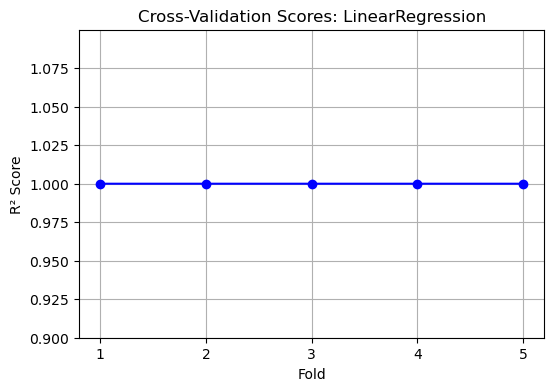

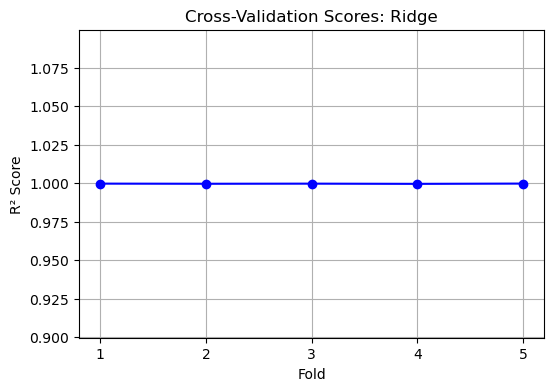

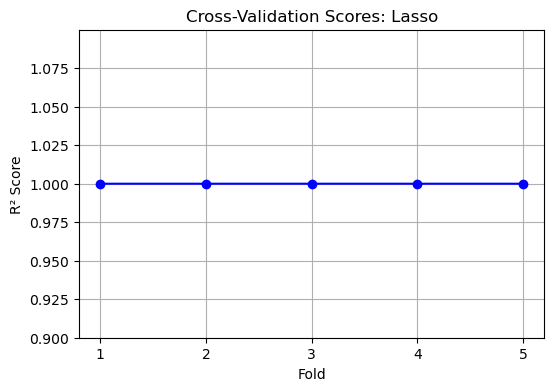

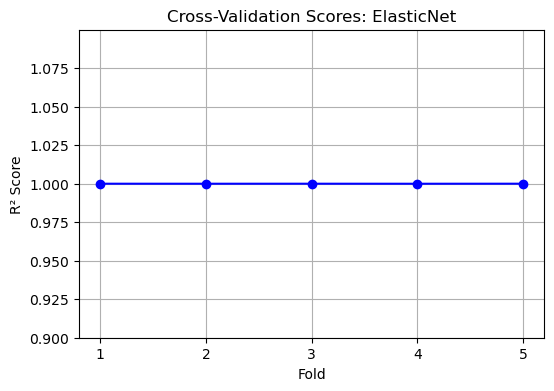

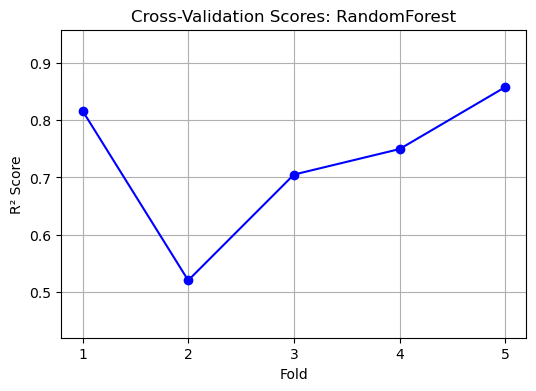

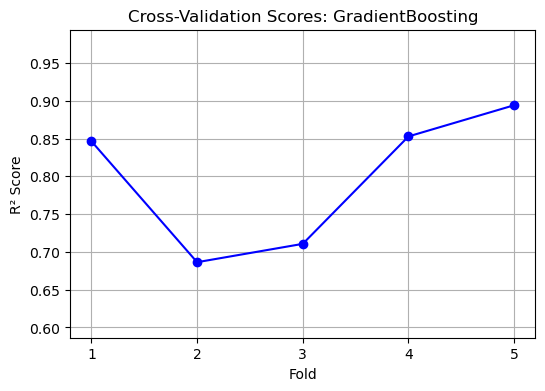

In [139]:
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.datasets import make_regression

# -------------------------
# Example dataset
# -------------------------
X, y = make_regression(n_samples=100, n_features=5, noise=0.1, random_state=42)

# -------------------------
# Models
# -------------------------
models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(alpha=1.0, max_iter=5000),
    'Lasso': Lasso(alpha=0.01, max_iter=5000),
    'ElasticNet': ElasticNet(alpha=0.01, l1_ratio=0.5, max_iter=5000),
    'RandomForest': RandomForestRegressor(n_estimators=100, random_state=42),
    'GradientBoosting': GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
}

# -------------------------
# K-Fold CV
# -------------------------
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# -------------------------
# Plot CV scores separately
# -------------------------
for name, model in models.items():
    # Calculate cross-validation scores
    scores = cross_val_score(model, X, y, cv=kf, scoring='r2')
    
    # Plot
    plt.figure(figsize=(6,4))
    plt.plot(range(1, len(scores) + 1), scores, marker='o', linestyle='-', color='blue')
    plt.title(f"Cross-Validation Scores: {name}")
    plt.xlabel("Fold")
    plt.ylabel("R² Score")
    plt.xticks(range(1, kf.get_n_splits() + 1))
    plt.ylim(min(scores)-0.1, max(scores)+0.1)  # dynamic y-axis
    plt.grid(True)
    plt.show()


In [140]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# -----------------------------
# K-Fold
# -----------------------------
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# -----------------------------
# Models & Hyperparameter Grids
# -----------------------------

param_grid = {

    # Linear Regression
    "LinearRegression": {
        "model": LinearRegression(),
        "params": {
            "fit_intercept": [True, False],
            "copy_X": [True]
        }
    },

    # Ridge Regression
    "Ridge": {
        "model": Ridge(),
        "params": {
            "alpha": [0.1, 1, 5, 10, 50, 100],
            "max_iter": [1000, 3000, 5000]
        }
    },

    # Lasso Regression
    "Lasso": {
        "model": Lasso(),
        "params": {
            "alpha": [0.001, 0.01, 0.1, 1, 10],
            "max_iter": [1000, 3000, 5000]
        }
    },

    # Elastic Net
    "ElasticNet": {
        "model": ElasticNet(),
        "params": {
            "alpha": [0.001, 0.01, 0.1, 1, 10],
            "l1_ratio": [0.1, 0.5, 0.7, 1],
            "max_iter": [1000, 3000, 5000]
        }
    },

    # Random Forest Regressor
    "RandomForest": {
        "model": RandomForestRegressor(),
        "params": {
            "n_estimators": [100, 200, 300],
            "max_depth": [None, 10, 20],
            "min_samples_split": [2, 5, 10],
            "min_samples_leaf": [1, 2, 4]
        }
    },

    # Gradient Boosting Regressor
    "GradientBoosting": {
        "model": GradientBoostingRegressor(),
        "params": {
            "n_estimators": [100, 200, 300],
            "learning_rate": [0.01, 0.05, 0.1],
            "max_depth": [3, 5, 7],
            "subsample": [0.8, 1.0]
        }
    }
}

# -----------------------------
# Run Grid Search for Each Model
# -----------------------------
best_models = {}

for name, mp in param_grid.items():
    print(f"Tuning {name}...")
    
    grid = GridSearchCV(
        estimator=mp["model"],
        param_grid=mp["params"],
        cv=kf,
        scoring='r2',
        n_jobs=-1
    )
    
    grid.fit(X, y)

    best_models[name] = {
        "best_score": grid.best_score_,
        "best_params": grid.best_params_,
        "best_estimator": grid.best_estimator_
    }

# -----------------------------
# Print Results
# -----------------------------
for name, res in best_models.items():
    print("\n==========================")
    print("Model:", name)
    print("Best R2 Score:", res["best_score"])
    print("Best Hyperparameters:", res["best_params"])


Tuning LinearRegression...
Tuning Ridge...
Tuning Lasso...
Tuning ElasticNet...
Tuning RandomForest...
Tuning GradientBoosting...

Model: LinearRegression
Best R2 Score: 0.9999995068662688
Best Hyperparameters: {'copy_X': True, 'fit_intercept': False}

Model: Ridge
Best R2 Score: 0.9999969870756635
Best Hyperparameters: {'alpha': 0.1, 'max_iter': 1000}

Model: Lasso
Best R2 Score: 0.9999994957313236
Best Hyperparameters: {'alpha': 0.001, 'max_iter': 1000}

Model: ElasticNet
Best R2 Score: 0.9999994957313236
Best Hyperparameters: {'alpha': 0.001, 'l1_ratio': 1, 'max_iter': 1000}

Model: RandomForest
Best R2 Score: 0.7302979616788206
Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

Model: GradientBoosting
Best R2 Score: 0.8453499964541464
Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}


In [145]:
import joblib

# Select the model with the highest R2 score from tuning
best_model_name = max(best_models, key=lambda x: best_models[x]["best_score"])
best_model = best_models[best_model_name]["best_estimator"]

# Save the best model
joblib.dump(best_model, "clv_model.pkl")

print("Best model saved as clv_model.pkl")
print("Best Model:", best_model_name)
print("R2 Score:", best_models[best_model_name]["best_score"])


Best model saved as clv_model.pkl
Best Model: LinearRegression
R2 Score: 0.9999995068662688


In [146]:
model = joblib.load('clv_model.pkl')

In [75]:
import joblib

model_path = r"C:\Users\USER\Desktop\project1\supervised ml\customer lifetime value prediciton\clv_model.pkl"
model = joblib.load(model_path)